In [1]:
import numpy as np
import pandas as pd 
import os
import torch
from torchvision import datasets, transforms
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
from PIL import Image

class CustomImageDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        
        # Получаем список папок (классов)
        self.class_folders = sorted(os.listdir(data_dir))
        
        # Создаем словарь, где ключ - это название класса, а значение - это его порядковый номер (метка)
        self.class_to_label = {class_name: i for i, class_name in enumerate(self.class_folders)}
        
        # Получаем список всех файлов с изображениями и их соответствующие метки
        self.samples = self.load_samples()
    
    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, label
    
    def load_samples(self):
        samples = []
        
        for class_folder in self.class_folders:
            class_path = os.path.join(self.data_dir, class_folder)
            image_files = os.listdir(class_path)
            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)
                samples.append((image_path, self.class_to_label[class_folder]))
        return samples        

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.ToTensor(),
])

train_dataset = CustomImageDataset(data_dir='/kaggle/input/fruit-recognition/train/train', transform=train_transform)
test_dataset = CustomImageDataset(data_dir='/kaggle/input/fruit-recognition/train/train', transform=test_transform)

batch_size = 256
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=batch_size)

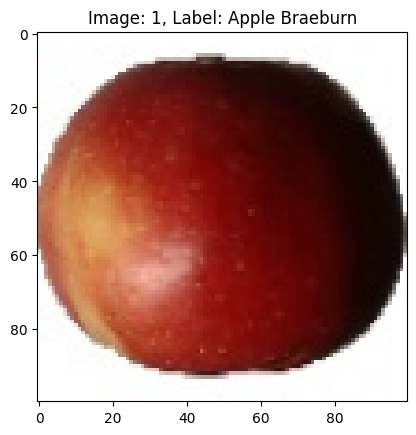

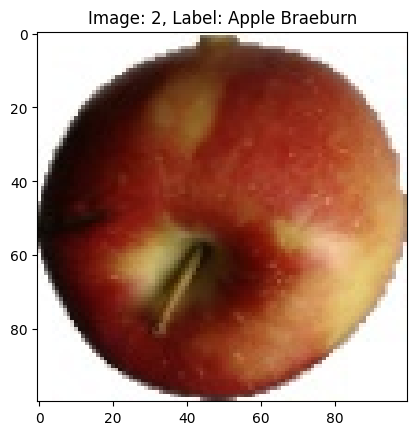

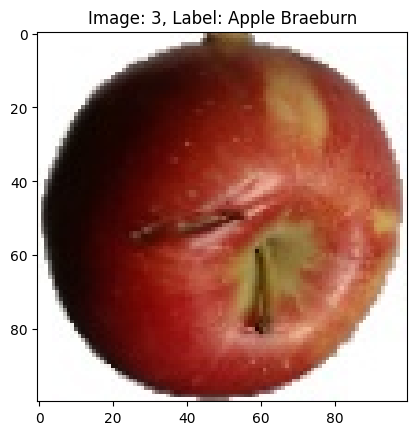

In [4]:
import matplotlib.pyplot as plt

for i in range(3):
    img, label = train_dataset[i]
    
    img = img.numpy()
    img = img.transpose((1, 2, 0))

    label_name = train_dataset.class_folders[label]

    plt.imshow(img)
    plt.title(f"Image: {i+1}, Label: {label_name}")
    plt.show()

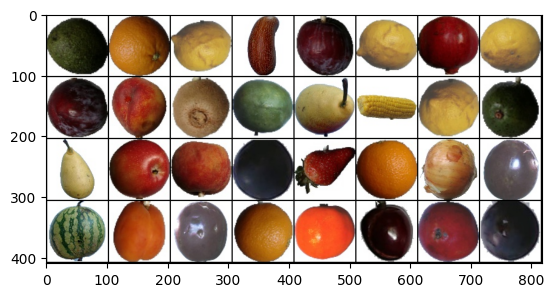

In [5]:
from torchvision.utils import make_grid

loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

batch, labels = next(iter(loader))

grid = make_grid(batch).permute(1, 2, 0)

plt.imshow(grid)

In [6]:
#########################################################################################
#                                  Стандартный способ

In [7]:
train_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.ToTensor(),
])

train_data = datasets.ImageFolder(root='/kaggle/input/fruit-recognition/train/train', transform=train_transform)
test_data = datasets.ImageFolder(root='/kaggle/input/fruit-recognition/test', transform=test_transform)

batch_size = 256
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)

train_data.classes

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

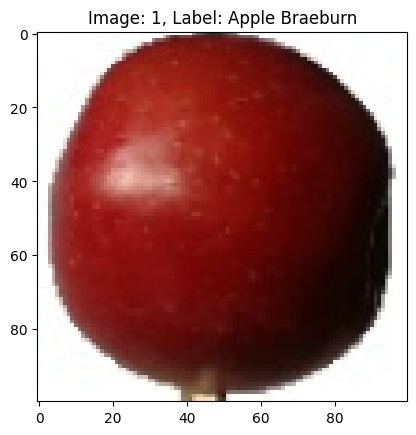

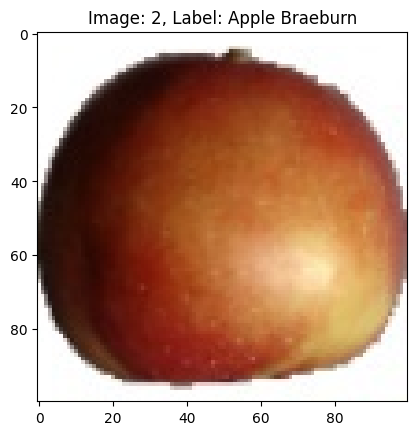

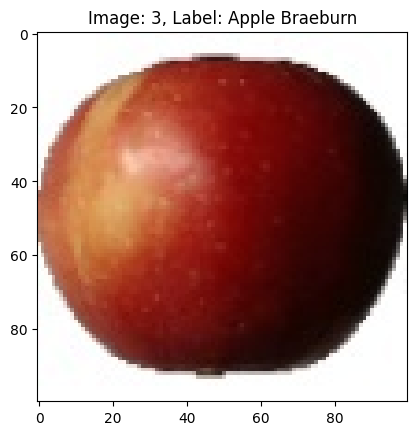

In [8]:
import matplotlib.pyplot as plt

for i in range(3):
    img, label = train_data[i]

    img = img.numpy()
    img = img.transpose((1, 2, 0))

    label_name = train_data.classes[label]

    plt.imshow(img)
    plt.title(f"Image: {i+1}, Label: {label_name}")
    plt.show()



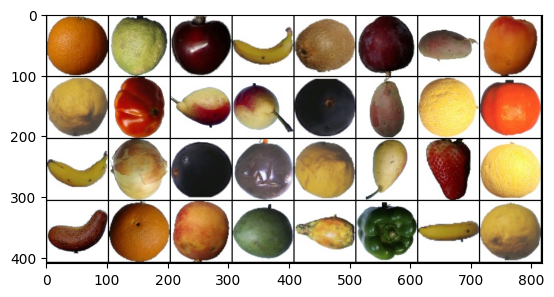

In [9]:
from torchvision.utils import make_grid

loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=32)

batch, labels = next(iter(loader))

grid = make_grid(batch).permute(1, 2, 0)

plt.imshow(grid)